# Exploratory Data Analysis - Sports

Author:Femi Babu

In this task we perform Exploratory Data Analysis on dataset ‘Indian Premier League’. From a Sports Analyst's perspective we have to find out the most successful teams, players and factors contributing win or loss of a team. Also we should suggest teams or players a company which endorse for its products.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\\Users\\W8.1 Pro\\Desktop\\IPL\\matches.csv")
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [4]:
df = df[df['city'].notna()]
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
id,0
season,0
city,0
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [5]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
df = df.rename(columns={'id':'ID', 'season':'SEASON', 'city':'CITY', 'date':'DATE', 'team1':'TEAM_1', 'team2':'TEAM_2', 'toss_winner':'TOSS_WINNER',
       'toss_decision':'TOSS_DECISION', 'result':'RESULT', 'dl_applied':'DL_APPLIED', 'winner':'WINNER', 'win_by_runs':'WIN_BY_RUN',
       'win_by_wickets':'WIN_BY_WICKETS', 'player_of_match':'PLAYER_OF_MATCH', 'venue':'VENUE', 'umpire1':'UMPIRE_1', 'umpire2':'UMPIRE_2',
       'umpire3':'UMPIRE_3'})

In [7]:
df=df.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [8]:
df.head()

,ID,SEASON,CITY,DATE,TEAM_1,TEAM_2,TOSS_WINNER,TOSS_DECISION,RESULT,DL_APPLIED,WINNER,WIN_BY_RUN,WIN_BY_WICKETS,PLAYER_OF_MATCH,VENUE,UMPIRE_1,UMPIRE_2,UMPIRE_3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               749 non-null    int64 
 1   SEASON           749 non-null    int64 
 2   CITY             749 non-null    object
 3   DATE             749 non-null    object
 4   TEAM_1           749 non-null    object
 5   TEAM_2           749 non-null    object
 6   TOSS_WINNER      749 non-null    object
 7   TOSS_DECISION    749 non-null    object
 8   RESULT           749 non-null    object
 9   DL_APPLIED       749 non-null    int64 
 10  WINNER           745 non-null    object
 11  WIN_BY_RUN       749 non-null    int64 
 12  WIN_BY_WICKETS   749 non-null    int64 
 13  PLAYER_OF_MATCH  745 non-null    object
 14  VENUE            749 non-null    object
 15  UMPIRE_1         747 non-null    object
 16  UMPIRE_2         747 non-null    object
 17  UMPIRE_3         119 non-null    ob

In [10]:
df.corr()

,ID,SEASON,DL_APPLIED,WIN_BY_RUN,WIN_BY_WICKETS
ID,1.000000,0.669436,-0.012242,-0.040931,-0.012357
SEASON,0.669436,1.000000,-0.000869,-0.036941,-0.009386
DL_APPLIED,-0.012242,-0.000869,1.000000,-0.016980,-0.011704
WIN_BY_RUN,-0.040931,-0.036941,-0.016980,1.000000,-0.561696
WIN_BY_WICKETS,-0.012357,-0.009386,-0.011704,-0.561696,1.000000


<AxesSubplot:>

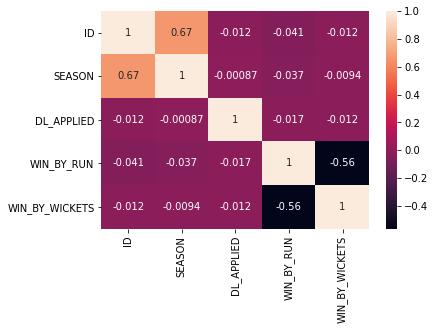

In [11]:
sns.heatmap(df.corr(), annot=True)

In [12]:
a=df[['SEASON','CITY','DATE','TEAM_1','TEAM_2','TOSS_WINNER','WINNER']]
a['SEASON'].value_counts().reset_index()

,index,SEASON
0,2013,76
1,2012,74
2,2011,73
3,2010,60
4,2016,60
5,2018,60
6,2019,60
7,2015,59
8,2017,59
9,2008,58


In [13]:
a['CITY'].value_counts().reset_index()

,index,CITY
0,Mumbai,101
1,Kolkata,77
2,Delhi,74
3,Bangalore,66
4,Hyderabad,64
5,Chennai,57
6,Jaipur,47
7,Chandigarh,46
8,Pune,38
9,Durban,15


In [14]:
w=a['TEAM_1'].value_counts().reset_index()

In [15]:
t=a['TEAM_2'].value_counts().reset_index()

In [16]:
u=a['TOSS_WINNER'].value_counts().reset_index()

In [17]:
v=a['WINNER'].value_counts().reset_index()

In [18]:
merge = pd.merge(w, t, how='right',on='index')
merge_1 = pd.merge(merge, u, how='right',on='index')
merge_2= pd.merge(merge_1, v, how='right',on='index')
merge_2.rename(columns = {'index':'TEAMS','TEAM_1':'HOST','TEAM_2':'GUEST'}, inplace = True)
merge_2

,TEAMS,HOST,GUEST,TOSS_WINNER,WINNER
0,Mumbai Indians,99,85,96,109
1,Chennai Super Kings,88,74,89,98
2,Kolkata Knight Riders,82,95,91,92
3,Royal Challengers Bangalore,84,94,80,83
4,Kings XI Punjab,91,84,80,81
5,Rajasthan Royals,67,79,79,75
6,Delhi Daredevils,72,87,80,66
7,Sunrisers Hyderabad,61,45,45,56
8,Deccan Chargers,43,32,43,29
9,Rising Pune Supergiant,15,15,13,15


In [19]:
merge_2['TOTAL_MATCH']=merge_2['HOST']+merge_2['GUEST']
merge_2['WINNING_PRC']=merge_2['WINNER']*100/merge_2['TOTAL_MATCH']
merge_2

,TEAMS,HOST,GUEST,TOSS_WINNER,WINNER,TOTAL_MATCH,WINNING_PRC
0,Mumbai Indians,99,85,96,109,184,59.239130
1,Chennai Super Kings,88,74,89,98,162,60.493827
2,Kolkata Knight Riders,82,95,91,92,177,51.977401
3,Royal Challengers Bangalore,84,94,80,83,178,46.629213
4,Kings XI Punjab,91,84,80,81,175,46.285714
5,Rajasthan Royals,67,79,79,75,146,51.369863
6,Delhi Daredevils,72,87,80,66,159,41.509434
7,Sunrisers Hyderabad,61,45,45,56,106,52.830189
8,Deccan Chargers,43,32,43,29,75,38.666667
9,Rising Pune Supergiant,15,15,13,15,30,50.000000


In [20]:
a=df['TOSS_DECISION'].value_counts().reset_index()
a

,index,TOSS_DECISION
0,field,459
1,bat,290


In [21]:
b=a['TOSS_DECISION'].sum()
a['PERCENTAGE_FORUM']=a['TOSS_DECISION']*100/b
a

,index,TOSS_DECISION,PERCENTAGE_FORUM
0,field,459,61.281709
1,bat,290,38.718291


In [22]:
df['RESULT'].value_counts().reset_index()

,index,RESULT
0,normal,736
1,tie,9
2,no result,4


In [23]:
d=df[['TOSS_WINNER','WINNER','TOSS_DECISION']]
comparison_column = np.where(d['TOSS_WINNER']== d['WINNER'], True, False)
d['EQUAL'] = comparison_column

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
d

,TOSS_WINNER,WINNER,TOSS_DECISION,EQUAL
0,Royal Challengers Bangalore,Sunrisers Hyderabad,field,False
1,Rising Pune Supergiant,Rising Pune Supergiant,field,True
2,Kolkata Knight Riders,Kolkata Knight Riders,field,True
3,Kings XI Punjab,Kings XI Punjab,field,True
4,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,True
...,...,...,...,...
751,Mumbai Indians,Mumbai Indians,field,True
752,Chennai Super Kings,Mumbai Indians,bat,False
753,Delhi Capitals,Delhi Capitals,field,True
754,Chennai Super Kings,Chennai Super Kings,field,True


In [25]:
e=d['EQUAL'].value_counts().reset_index()
e

,index,EQUAL
0,True,390
1,False,359


In [26]:
e['PERCENTAGE_FORUM']=e['EQUAL']*100/e['EQUAL'].sum()
e

,index,EQUAL,PERCENTAGE_FORUM
0,True,390,52.069426
1,False,359,47.930574


In [27]:
f=df['PLAYER_OF_MATCH'].value_counts().reset_index()
f.head(20)

,index,PLAYER_OF_MATCH
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


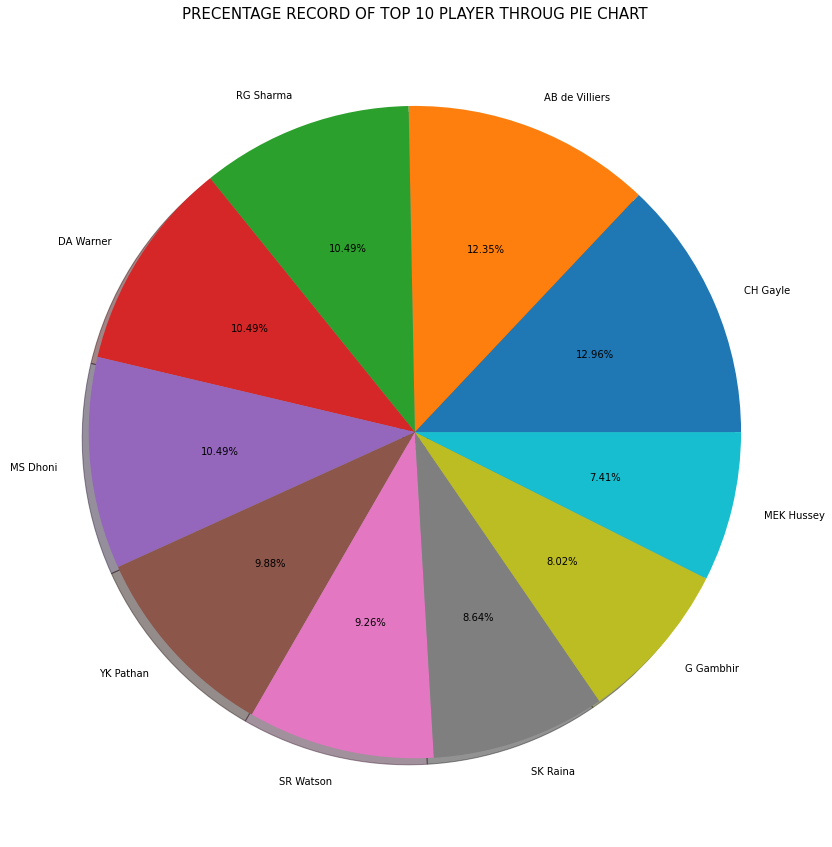

In [28]:
plt.figure(figsize=(15,15))
plt.pie(f['PLAYER_OF_MATCH'][:10],labels=f['index'][:10],autopct='%0.2f%%',shadow=True,counterclock=True)
plt.title('PRECENTAGE RECORD OF TOP 10 PLAYER THROUG PIE CHART',fontsize=15)
plt.show()

Text(0.5, 1.0, 'MATCH WINNER')

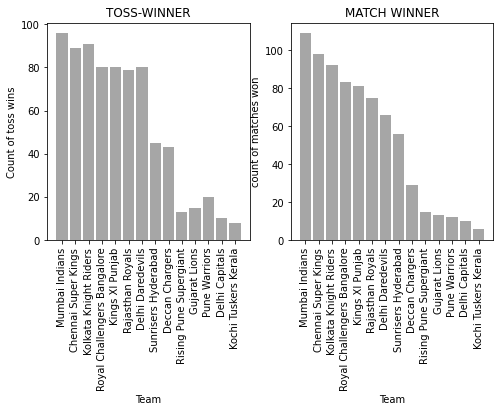

In [29]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
plt.xlabel('Team')
plt.ylabel('Count of toss wins')
plt.title('TOSS-WINNER')
plt.bar(merge_2['TEAMS'],merge_2['TOSS_WINNER'], width=0.85,alpha=0.7, color='grey',ecolor='black')
plt.xticks(rotation=90)


ax2 = fig.add_subplot(122)
plt.bar(merge_2['TEAMS'],merge_2['WINNER'], width=0.85,alpha=0.7, color='grey',ecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('count of matches won')
plt.title('MATCH WINNER')

# Thank you